# 0.4. Визуализация данных с использованием библиотек matplotlib и seaborn
Автор - Одинцова В.А.

















## Цель работы
Научиться строить некоторые виды графиков, используемые в анализе данных, при помощи библиотек matplotlib и seaborn.


### Задания для выполнения:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загрузите датасет для предсказани цены квартиры в зависимости от ряда признаков.

In [3]:
town = pd.read_csv('town.csv')
town.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


Постройте круговую диаграмму для признака Rooms, иллюстрирующую количество квартир в процентах в зависимости от количества комнат. Сделайте сектор с наибольшим числом квартир выдвинутым.

In [4]:
town.groupby(town['Rooms'])['Id'].count()

Rooms
0.0        8
1.0     3705
2.0     3880
3.0     2235
4.0      150
5.0       18
6.0        1
10.0       2
19.0       1
Name: Id, dtype: int64

In [5]:
town['Rooms'].unique()

array([ 3.,  1.,  2.,  4.,  5., 10.,  0., 19.,  6.])

(-1.2180574461114138,
 1.105621783153558,
 -1.1535842042214925,
 1.1222674419033176)

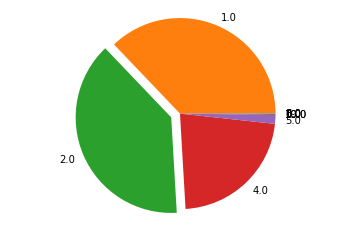

In [6]:
vals = town.groupby(town['Rooms'])['Id'].count()
labels = town['Rooms'].unique()
fig, ax = plt.subplots()
explode = (0, 0, 0.1, 0, 0, 0, 0, 0, 0) # выдвинутый сектор
ax.pie(vals, labels=labels, explode=explode)
ax.axis("equal")

Постройте гистограмму целевой переменной Price. Оцените визуально, по какой цене продаётся наибольшее количество квартир.

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([ 59174.77802758,  59232.18389644,  59289.58976529, ...,
        633118.65483224, 633176.06070109, 633233.46656995]),
 <BarContainer object of 10000 artists>)

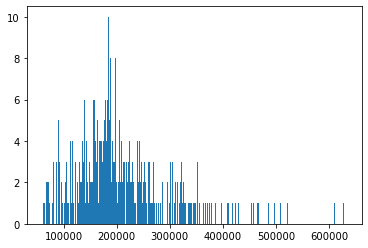

In [8]:
n_bins = len(town['Price'])
plt.hist(town['Price'], bins=n_bins)

Постройте диаграммы рассеяния для признаков Rooms, Square, HouseFloor, HouseYear в зависимости от целевой переменной Price в одной области fiagure(). Оцените визуально, есть ли среди них такие, на которых разброс точек близок к линейной функции.

Text(0, 0.5, 'Price')

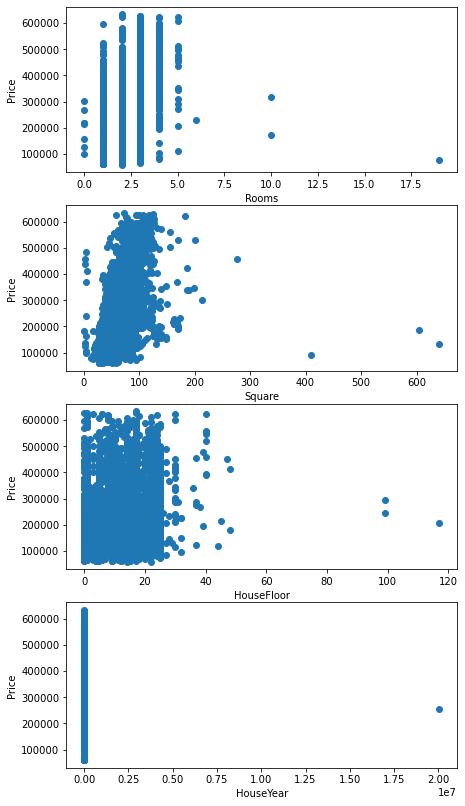

In [9]:
fig, ax = plt.subplots(4,figsize=(7, 14))
ax[0].scatter(x = town['Rooms'], y = town['Price']) # зависимость Rooms от Price
ax[0].set_xlabel("Rooms")
ax[0].set_ylabel("Price")

ax[1].scatter(x = town['Square'], y = town['Price'])
ax[1].set_xlabel("Square")
ax[1].set_ylabel("Price")

ax[2].scatter(x = town['HouseFloor'], y = town['Price'])
ax[2].set_xlabel("HouseFloor")
ax[2].set_ylabel("Price")

ax[3].scatter(x = town['HouseYear'], y = town['Price'])
ax[3].set_xlabel("HouseYear")
ax[3].set_ylabel("Price")

HouseYear за исключением одного выброса наиболее близок к линейной функции

Постройте ядерную оценку плотности целевой переменной Price. Оцените визуально, напоминает ли полученный график нормальное распределение. Постройте двумерную ядерную оценку плотности для целевой переменной Price и признака HouseFloor, затем оцените визуально на каких этажах и по какой цене продаётся основная масса квартир.

In [10]:
import seaborn as sns

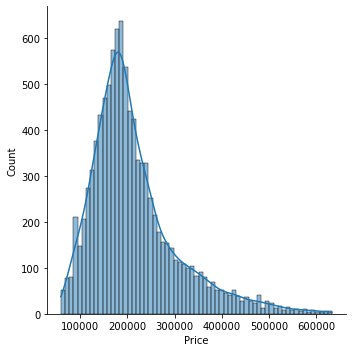

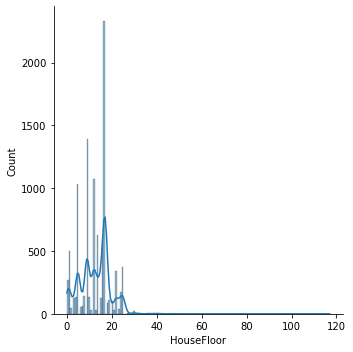

In [11]:
sns.displot(x=town['Price'], kde=True, label='Price') # kde - график плотности
sns.displot(x=town['HouseFloor'], kde=True)

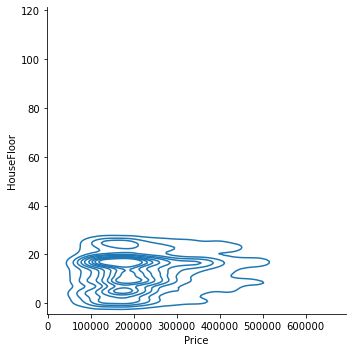

In [12]:
sns.displot(x="Price",
            y="HouseFloor",
            kind='kde',
            data=town);

Самая популярная цена квартир 200000 \
Самый популярный этаж примерно 18 \
3 график - Ядро продаж наших квартир находится в стоимости (110000;210000) и на (17;19) этаже

Постройте ящиковую диаграмму признака Square. Оцените визуально имеются ли выбросы, и, если да, то начиная с какого размера площади значение признака можно считать выбросом.

{'whiskers': [<matplotlib.lines.Line2D at 0x15759826ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x15759836610>,
 'boxes': [<matplotlib.lines.Line2D at 0x15759826bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x15759836cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15759843070>],
 'means': []}

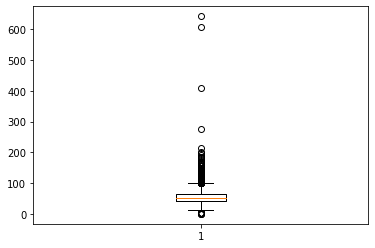

In [13]:
plt.boxplot(x=town['Square'])

Кружки - выбросы

При помощи сетки графиков PairGrid визуализируйте попарные отношения признаков Rooms, Square, HouseFloor, HouseYear, Price следующим образом: на диагонали - гистограммы, под диагональю - ядерные оценки плотности, над диагональю - диаграммы рассеяния. По результатам визуализации сделайте выводы (аналогичные п.2,3,4).

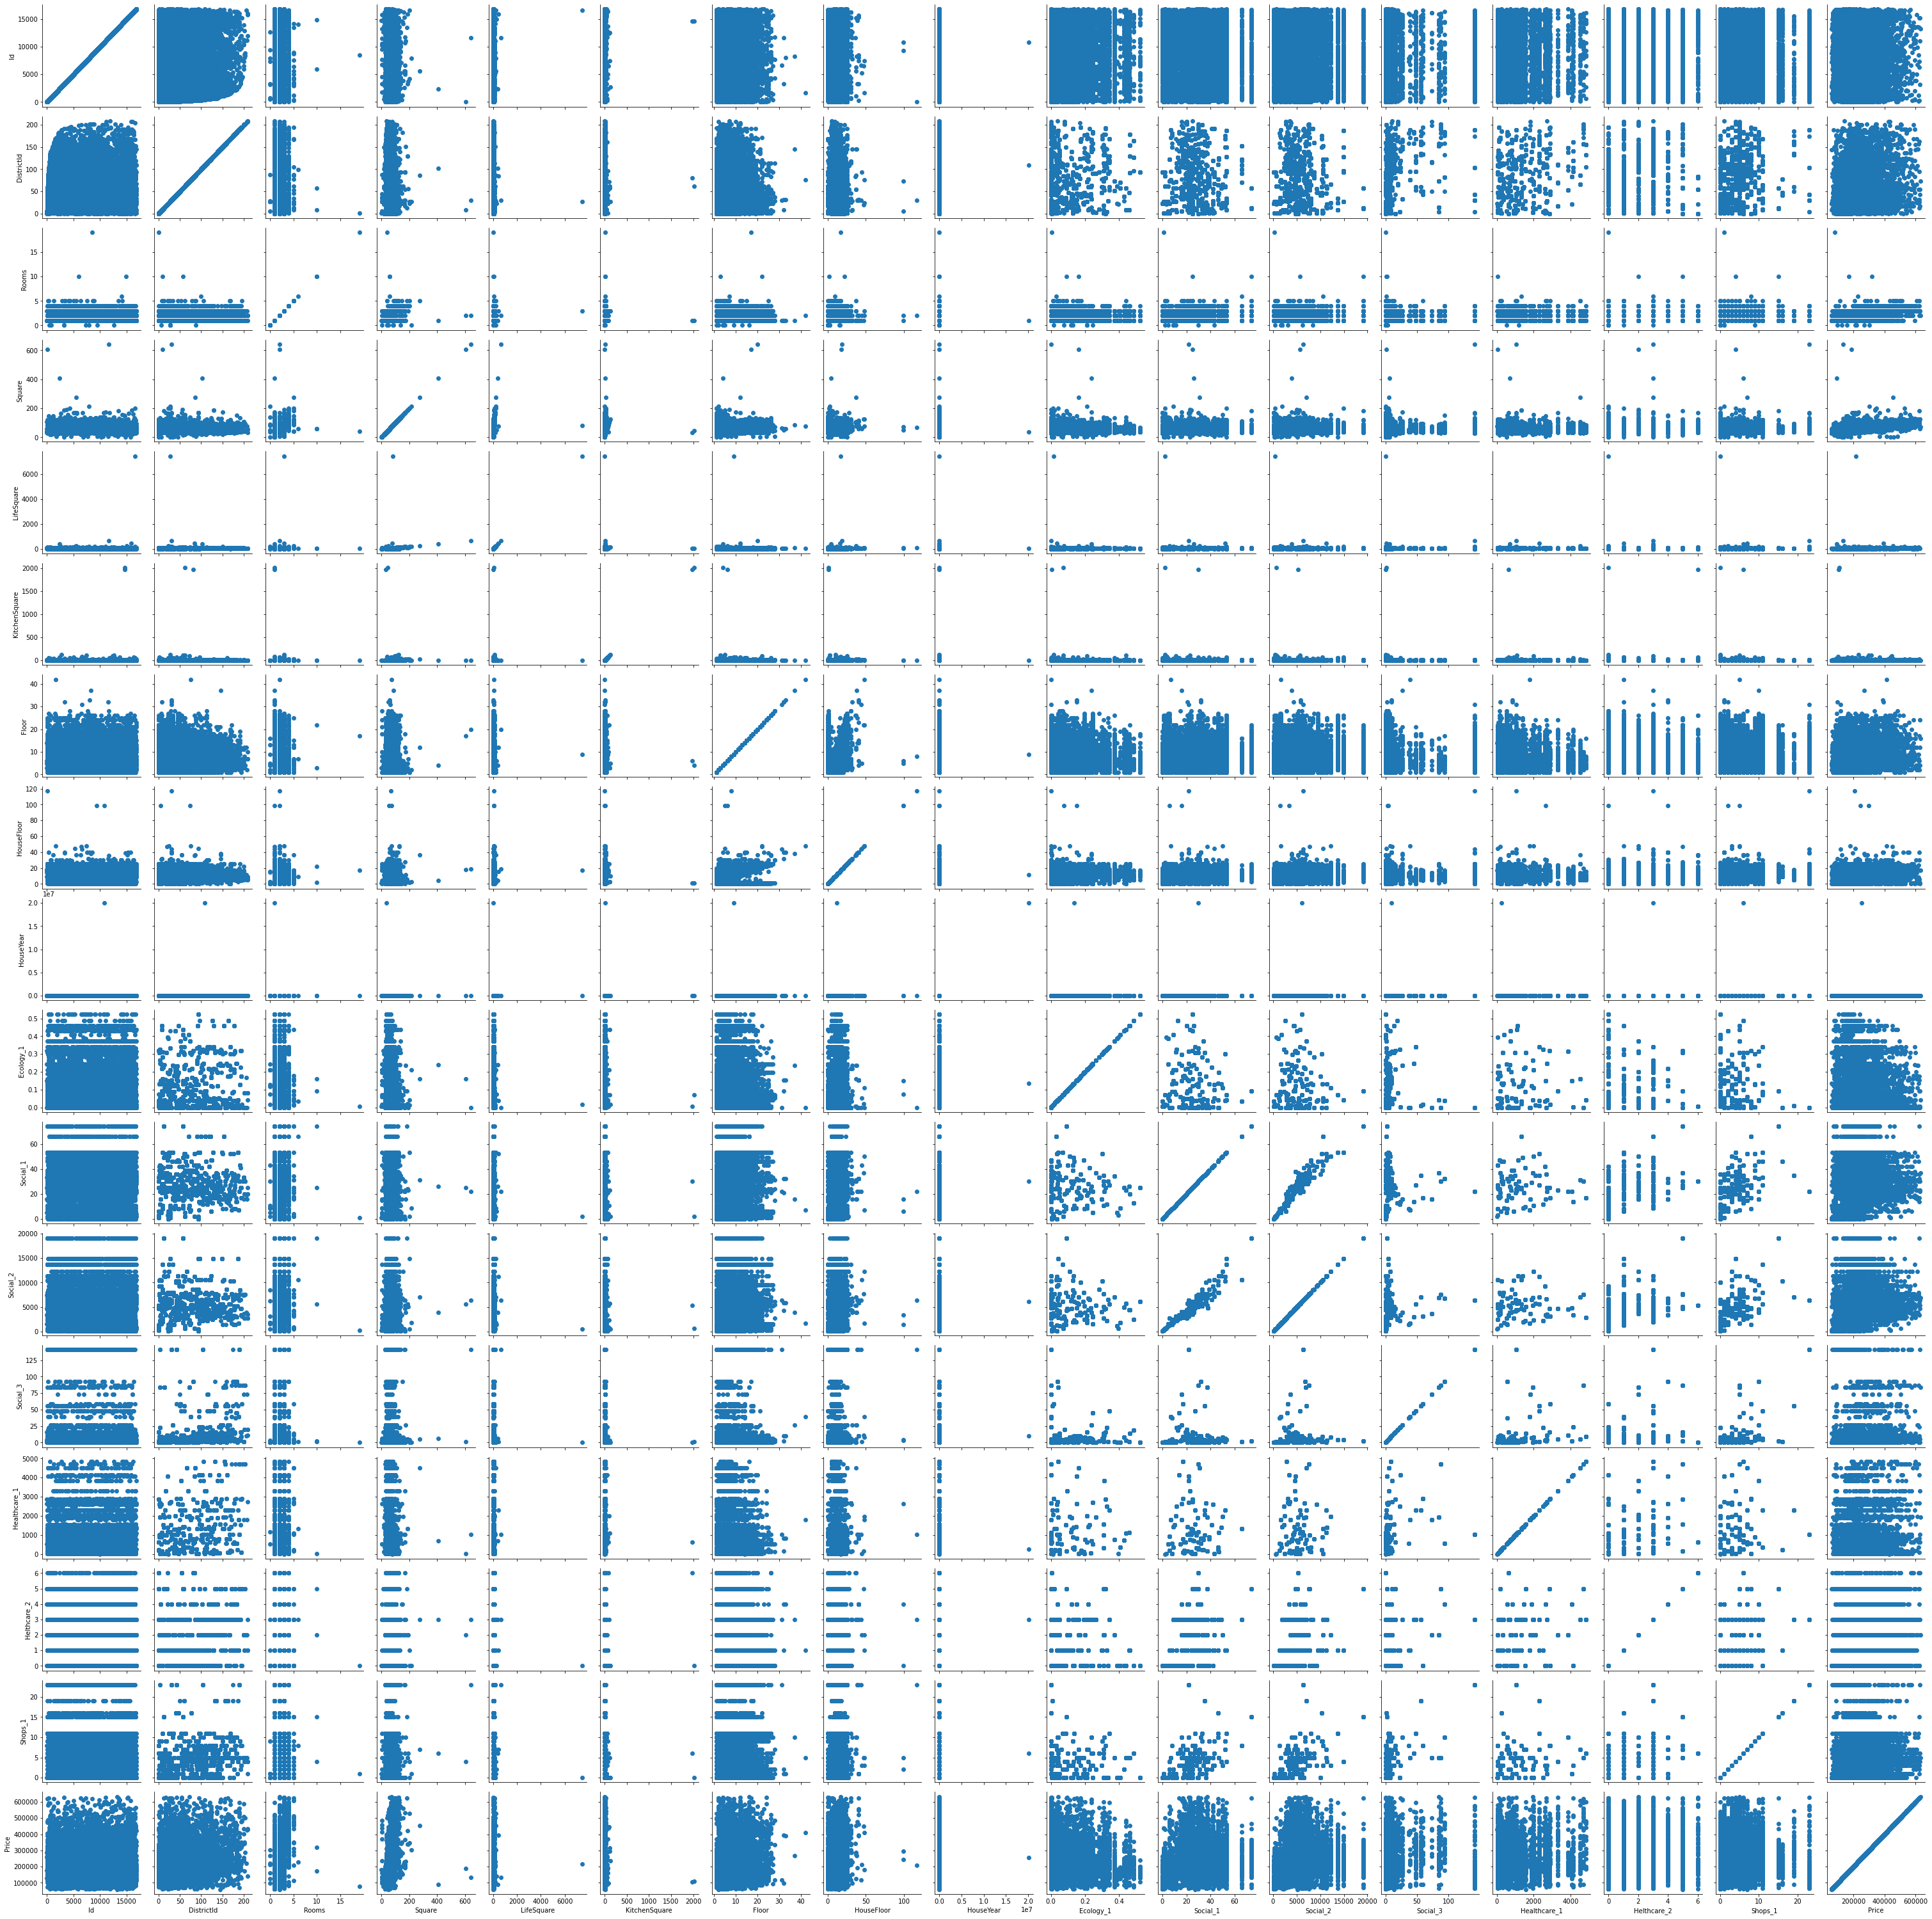

In [14]:
graph = sns.PairGrid(town) # строим сетку по 2 признакам для каждого столбца таблицы
graph.map(plt.scatter) # строим графики из точек для всех элементов списка

Постройте тепловую карту матрицы корреляции (df.corr()) признаков Rooms, Square, HouseFloor, HouseYear, Price. По ней определите, какие признаки являются зависимыми (у таких признаков коэффициент корреляции близок к единице).

<AxesSubplot:>

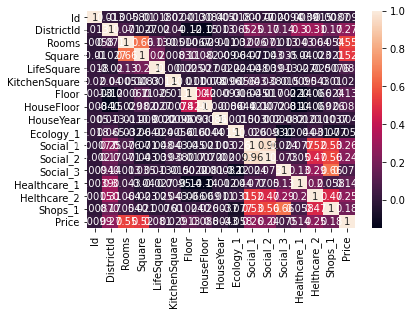

In [15]:
sns.heatmap(town.corr(), annot = True) # annot добавляет значение корреляции
# https://datastart.ru/blog/read/seaborn-heatmaps-13-sposobov-nastroit-vizualizaciyu-matricy-korrelyacii

Должны быть подписаны названия графиков, названия осей, указаны значения на осях. Оцениваться будет использование количества различных атрибутов при построении графиков и визуальная красота.


### Методические указания
Ознакомьтесь с официальной документацией по библиотекам matplotlib и seaborn.

### Дополнительные задания:
Постройте график jointplot (гибрид scatterplot и histogram) из библиотеки seaborn.
Постройте график violinplot (гибрид boxplot и ядерной оценки плотности) из библиотеки seaborn.
Поработайте с сеткой подзаголовков FacetGrid.

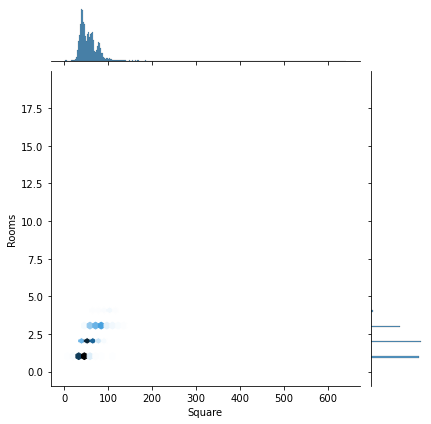

In [21]:
sns.jointplot(x = "Square", y = 'Rooms',
              kind = "hex", data = town)
# x = town['Square']
# hex - визуализация как гистограмма 
# из за выбросов график кажется растянутым

<AxesSubplot:xlabel='Floor'>

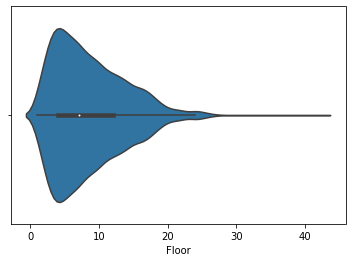

In [23]:
sns.violinplot(x=town['Price'])

FacetGrid имеет большое количество интерпритаций визуализаций

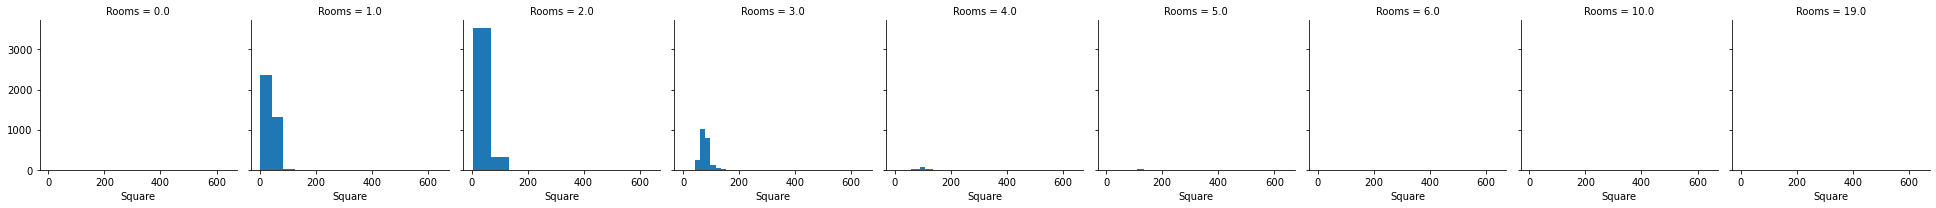

In [29]:
g = sns.FacetGrid(town,col='Rooms') # строим график по элементам колонки Rooms
g.map(plt.hist,"Square") # применяем к каждому элементу визуализацию гистограммы по Square

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


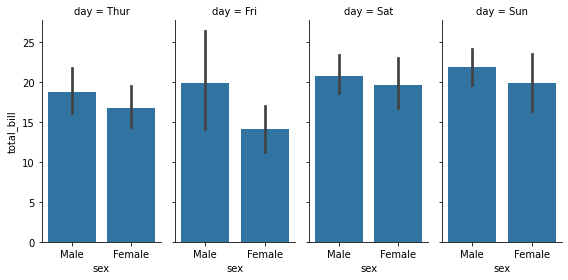

In [25]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips,col='day',size=4,aspect=0.5) # aspect - относительная высота
g.map(sns.barplot,"sex","total_bill")

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


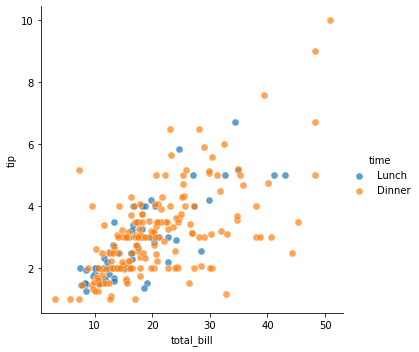

In [28]:
g=sns.FacetGrid(tips,hue="time",size=5)
g.map(plt.scatter,"total_bill","tip",s=50, alpha=0.7, linewidth=0.5,edgecolor="white")
g.add_legend()

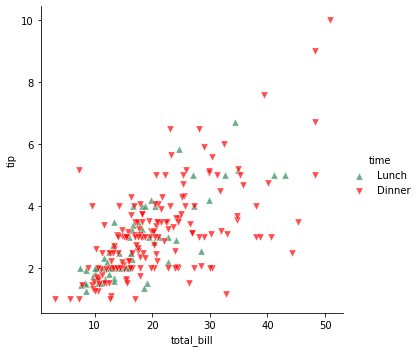

In [34]:
g=sns.FacetGrid(tips,hue="time",palette=dict(Lunch="seagreen",Dinner="red"),size=5,hue_kws={"marker":["^","v"]})
g.map(plt.scatter,"total_bill","tip",s=50, alpha=0.7, linewidth=0.5,edgecolor="white")
g.add_legend()

### Контрольные вопросы:
- Построение каких основных видов графиков используется при анализе данных в машинном обучении?
- В чём разница между библиотеками matplotlib и seaborn. Преимущества каждой из них.
- Как задать размер графика в matplotlib?
- Как установить стили в seaborn?
- Для чего используют подграфики subplots?
- Что изображается на ящиковой диаграмме?
- Как поменять палитру цветов у тепловой карты.